## Лабораторная работа №2

Задание: Реализовать эквализацию изображения

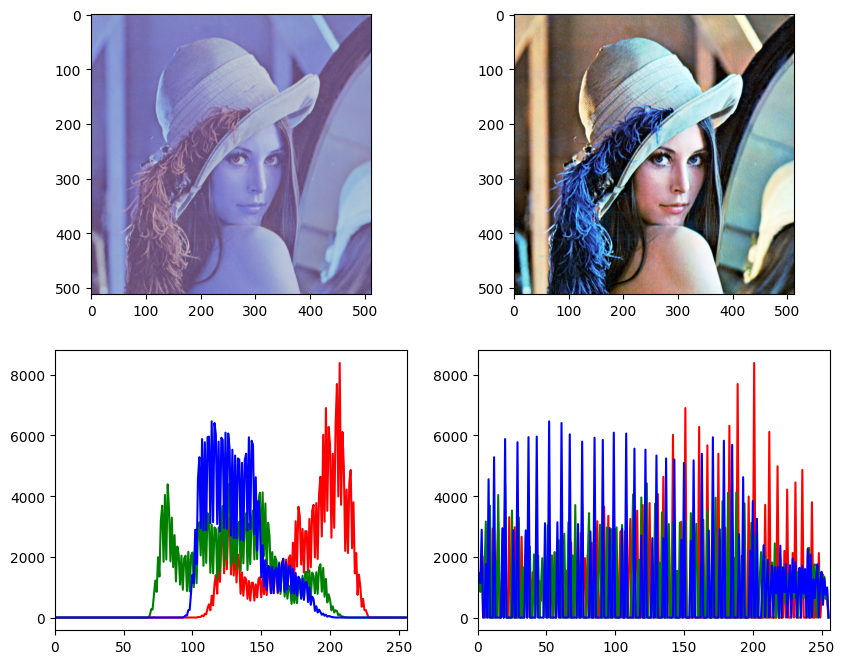

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def plot_rgb_hist(image, histSize, color_range):
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv.calcHist([image], [i], None, histSize, color_range)
        plt.plot(hist, color=col)
        plt.xlim(color_range)

def calcLut(image, channel, histSize, color_range):
    sumHistFunc = lambda b, e, hist: sum([hist[j] for j in range(b, e)])
    calcLutItemFunc = lambda i, hist: 255 * sumHistFunc(1, i, hist) / sumHistFunc(1, 255, hist)
    hist = cv.calcHist([image], [channel], None, histSize, color_range)
    lut = [int(calcLutItemFunc(i, hist)) for i in range(color_range[0], color_range[1])]
    return lut

def equalize(image, channels, histSize, color_range):
    result_image = image.copy()
    for channel in channels:
        lut = calcLut(image, channel, histSize, color_range)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                result_image[i][j][channel] = lut[image[i][j][channel]]
    return result_image

def run(image_path, func, code, channels, histSize, color_range):
    image = cv.imread(image_path)
    converted_image = cv.cvtColor(image, code)
    result_image = func(converted_image, channels, histSize, color_range)

    gs = plt.GridSpec(2, 2)
    plt.figure(figsize=(10, 8))
    plt.subplot(gs[0])
    plt.imshow(image)
    plt.subplot(gs[1])
    plt.imshow(result_image)
    plt.subplot(gs[2])
    plot_rgb_hist(converted_image, histSize, color_range)
    plt.subplot(gs[3])
    plot_rgb_hist(result_image, histSize, color_range)
    plt.show()

code = cv.COLOR_BGR2RGB
channels = [0, 1, 2]
histSize = [256]
color_range = [0, 256]

run('./lenna_bad.png', equalize, code, channels, histSize, color_range)